In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle
from pandas import read_csv, DataFrame, isna
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
from typing import Tuple, List
import seaborn as sns
from matplotlib.patches import Rectangle

In [24]:
def plot_cm(cm: np.array, labels: List[str], title: str = '', 
            figsize: Tuple[int, int] = (4, 4)):
    """Plot confusion matrix.
    
    Args:
        cm: Confusion matrix with rows are true and columns are predictions.
        labels: Labels of the confusion matrix.
        title: Title of plot.
        figsize: Size of figure.
        
    """
    cm = DataFrame(cm, index=labels, columns=labels)
    
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        cm, cmap='viridis', annot=True, cbar=False, fmt=".0f", square=True, 
        linewidths=1, linecolor='black', annot_kws={"size": 18}
    )
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)
    
    plt.ylabel('True', fontsize=18, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
    
    plt.xlabel('Predicted', fontsize=18, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    return ax

In [16]:
data = read_csv('data.csv')

selected_features = [
    'Pre-NFT density (Hippocampus)',
    'iNFT density (Hippocampus)',
    'iNFT FOV count (Hippocampus)',
    'Pre-NFT Clustering Coef (r=400, Hippocampus)',
    'iNFT Clustering Coef (r=200, Hippocampus)',
    'iNFT Clustering Coef (r=300, Hippocampus)',
    'iNFT density (Amygdala)',
    'iNFT FOV count (Amygdala)',
    'iNFT Clustering Coef (r=200, Amygdala)',
    'Pre-NFT density (Temporal cortex)',
    'iNFT density (Temporal cortex)',
    'Pre-NFT FOV count (Temporal cortex)',
    'iNFT FOV count (Temporal cortex)',
    'iNFT Clustering Coef (r=150, Temporal cortex)',
    'iNFT Clustering Coef (r=200, Temporal cortex)',
    'iNFT Clustering Coef (r=250, Temporal cortex)',
    'iNFT Clustering Coef (r=300, Temporal cortex)',
    'Pre-NFT density (Occipital cortex)',
    'iNFT density (Occipital cortex)',
    'iNFT FOV count (Occipital cortex)'
]

In [10]:
# Load the training data.
X_train = np.load('x-train.npy')
y_train = np.load('y-train.npy')


In [13]:
# Hyperparameter tune the model.
# Hyperparameter tune Random Forest Classifier.
params = {
    'n_estimators': [
        int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)
    ],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create model (Random forest classifier).
rfc = RandomForestClassifier(random_state=64, class_weight=None)

# Search for best set of parameters, automatically fits the best parameters.
gs_rfc = RandomizedSearchCV(
    rfc, params, scoring='balanced_accuracy', cv=3, n_jobs=20, verbose=0, 
    random_state=64, n_iter=100
)

# Search for best hyperparameters.
gs_rfc  = gs_rfc.fit(X_train, y_train)

# Best estimator.
rfc = gs_rfc.best_estimator_

In [28]:
# Save the model to a file using pickle
with open('rfc.pkl', 'wb') as fh:
    pickle.dump(rfc, fh)

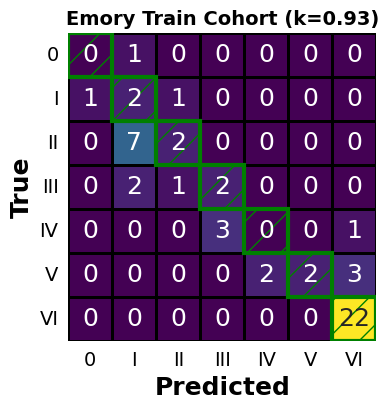

In [27]:
# Plot the confusion matrices.
stages = ['0', 'I', 'II', 'III', 'IV', 'V', 'VI']

# Predict stages on the Emory train cohort (test for Braak stages).
test_data = data[data.dataset == 'train']
X_test = test_data[selected_features].to_numpy()
y_test = test_data.stage.tolist()

y_test_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
k = cohen_kappa_score(y_test, y_test_pred, weights='quadratic')
ax = plot_cm(cm, stages, title=f"Emory Train Cohort (k={k:.2f})")

for i in range(len(stages)):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='green', lw=3, hatch='/'))
plt.show()

In [29]:
y_test

[6,
 6,
 2,
 3,
 1,
 6,
 5,
 6,
 1,
 5,
 0,
 2,
 1,
 2,
 4,
 2,
 6,
 2,
 3,
 2,
 3,
 6,
 2,
 6,
 4,
 5,
 6,
 2,
 6,
 6,
 1,
 6,
 5,
 2,
 6,
 6,
 5,
 6,
 4,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 4,
 5,
 3]

In [38]:
df = read_csv('../../temp.csv')
df = df.fillna(0)

for i, r in df.iterrows():
    for k, v in r.items():
        if isna(v):
            print(i)
            break

In [37]:
for k, v in df.iloc[33].items():
    print(k, v)

Braak NFT Stage I
Pre-NFT FOV count (Amygdala) 3.0
Pre-NFT clustering Coef (r=150) (Amygdala) 0.0
Pre-NFT clustering Coef (r=200) (Amygdala) 0.0
Pre-NFT clustering Coef (r=250) (Amygdala) 0.0
Pre-NFT clustering Coef (r=300) (Amygdala) 0.0
Pre-NFT clustering Coef (r=400) (Amygdala) 0.0
Pre-NFT density (Amygdala) 0.0073243113272035
PreNFT_count (Amygdala) 3.0
iNFT FOV count (Amygdala) 7.0
iNFT clustering Coef (r=150) (Amygdala) 0.0
iNFT clustering Coef (r=200) (Amygdala) 0.0
iNFT clustering Coef (r=250) (Amygdala) 0.0
iNFT clustering Coef (r=300) (Amygdala) 0.0
iNFT clustering Coef (r=400) (Amygdala) 0.0
iNFT density (Amygdala) 0.1098646699080533
iNFT_count (Amygdala) 45.0
Pre-NFT FOV count (Hippocampus) 6.0
Pre-NFT clustering Coef (r=150) (Hippocampus) 0.0
Pre-NFT clustering Coef (r=200) (Hippocampus) 0.4444444444444444
Pre-NFT clustering Coef (r=250) (Hippocampus) 0.4444444444444444
Pre-NFT clustering Coef (r=300) (Hippocampus) 0.8055555555555555
Pre-NFT clustering Coef (r=400) (Hippoc

In [93]:
import plotly.express as px

df = px.data.medals_wide(indexed=False)
df
# fig = px.imshow(df)
# fig.show()

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [70]:
t = np.array([stages]).T
t.shape

(7, 1)

In [72]:
temp = np.append(t, cm, 1)

In [73]:
temp

array([['0', '0', '1', '0', '0', '0', '0', '0'],
       ['I', '1', '2', '1', '0', '0', '0', '0'],
       ['II', '0', '7', '2', '0', '0', '0', '0'],
       ['III', '0', '2', '1', '2', '0', '0', '0'],
       ['IV', '0', '0', '0', '3', '0', '0', '1'],
       ['V', '0', '0', '0', '0', '2', '2', '3'],
       ['VI', '0', '0', '0', '0', '0', '0', '22']], dtype='<U21')

In [75]:
temp

array([['0', '0', '1', '0', '0', '0', '0', '0'],
       ['I', '1', '2', '1', '0', '0', '0', '0'],
       ['II', '0', '7', '2', '0', '0', '0', '0'],
       ['III', '0', '2', '1', '2', '0', '0', '0'],
       ['IV', '0', '0', '0', '3', '0', '0', '1'],
       ['V', '0', '0', '0', '0', '2', '2', '3'],
       ['VI', '0', '0', '0', '0', '0', '0', '22']], dtype='<U21')

In [80]:
temp.set_index(temp.iloc[0].values)

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

In [88]:
jc = DataFrame(temp, columns=[''] +  stages)
jc.set_index(jc.iloc[0].values)

ValueError: Length mismatch: Expected 7 rows, received array of length 8

In [91]:
df = DataFrame(cm, columns=stages)
df.set_index(stages)

Empty DataFrame
Columns: []
Index: [(0, 1, 0, 0, 0, 0, 0), (1, 2, 1, 0, 0, 0, 0), (0, 7, 2, 0, 0, 0, 0), (0, 2, 1, 2, 0, 0, 0), (0, 0, 0, 3, 0, 0, 1), (0, 0, 0, 0, 2, 2, 3), (0, 0, 0, 0, 0, 0, 22)]